### 학습목표
- 온습도 데이터를 분석하여 AI 제습기 개발을 위한 자료 생성
- 머신러닝의 7과정 이해한다
- 머신러닝의 학습과정을 이해하고 결과를 확인하자

### 머신러닝 7과정
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. EDA (탐색적 데이터 분석)
5. 모델선택 및 하이퍼파라미터 조절
6. 모델학습
7. 모델평가

### 1. 문제정의
- Role: 서비스 기획자
- 가정 내 온습도 측정 제품을 고객에게 서비스 제공
- 최근 판매량 감소로 단순히 제품판매 뿐만아니라 새로운 고객가치를 창출하고자함
- 온습도 센서로부터 수집한 데이터를 기반으로 AI 제습기를 개발하고자함 -> 환기 여부를 알람해주는 서비스


### 2. 데이터 수집
- crawling, 공공데이터 활용, DataBase, csv

In [ ]:
# 라이브러리 불러오기


In [ ]:
# 구글마운트

In [ ]:
# 현재 같은 폴더에 저장되어있는 파일 확인


 data  'ex01_머신러닝 7과정 학습.ipynb'


In [ ]:
# 데이터 불러오기


,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0
...,...,...,...,...
1541,19.250,46.625000,1.029781,0
1542,2.025,64.949998,0.466071,0
1543,35.325,28.475000,1.603368,0
1544,24.450,42.525000,1.285450,0


> **데이터 설명**

* 3개의 센서 데이터가 수집됨 (원활한 실습을 위해 라벨은 미리 달아두었음)
* 데이터 명세

| Column Name | 컬럼명 | 설명 |
|-------------|--------|------|
| T(temperature) | 온도 | 주변 환경의 온도 (섭씨) |
| RH(relative humidity) | 상대습도 | 공기 중 습도의 비율 (%) |
| AH(absolute humidity) | 절대습도 | 공기 중 실제 수증기량 |
| Comfortable | 쾌적 여부 | 환경이 쾌적한지 나타내는 이진값 - 0(불쾌), 1(상쾌) |

,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0


### 3. 데이터 전처리
- 이상치, 결측치 제거
- 변수 처리 (특성공학_특성추가, 삭제, 선택, 새로운 특성 생성... 등)
- 인코딩 (문자열데이터 -> 수치형)

In [ ]:

# 확인사항
#1. Non-Null Count -> 결측치 여부 확인 (머신러닝학습을 위해 결측지 존재 X)
#2. Dtype -> 데이터의 타입 확인 (머신러닝 학습을 위해 숫자형태의 데이터만 존재 O) -> 문자열 인코딩통해 수치형 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T            1546 non-null   float64
 1   RH           1546 non-null   float64
 2   AH           1546 non-null   float64
 3   Comfortable  1546 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 48.4 KB


##### 참고사항
- 데이터 전처리단계와 EDA(탐색적 데이터 분석) 경우는 유동적으로 왔다갔다하며 분석 진행
- 크게는 데이터 수집까지도 연결 가능

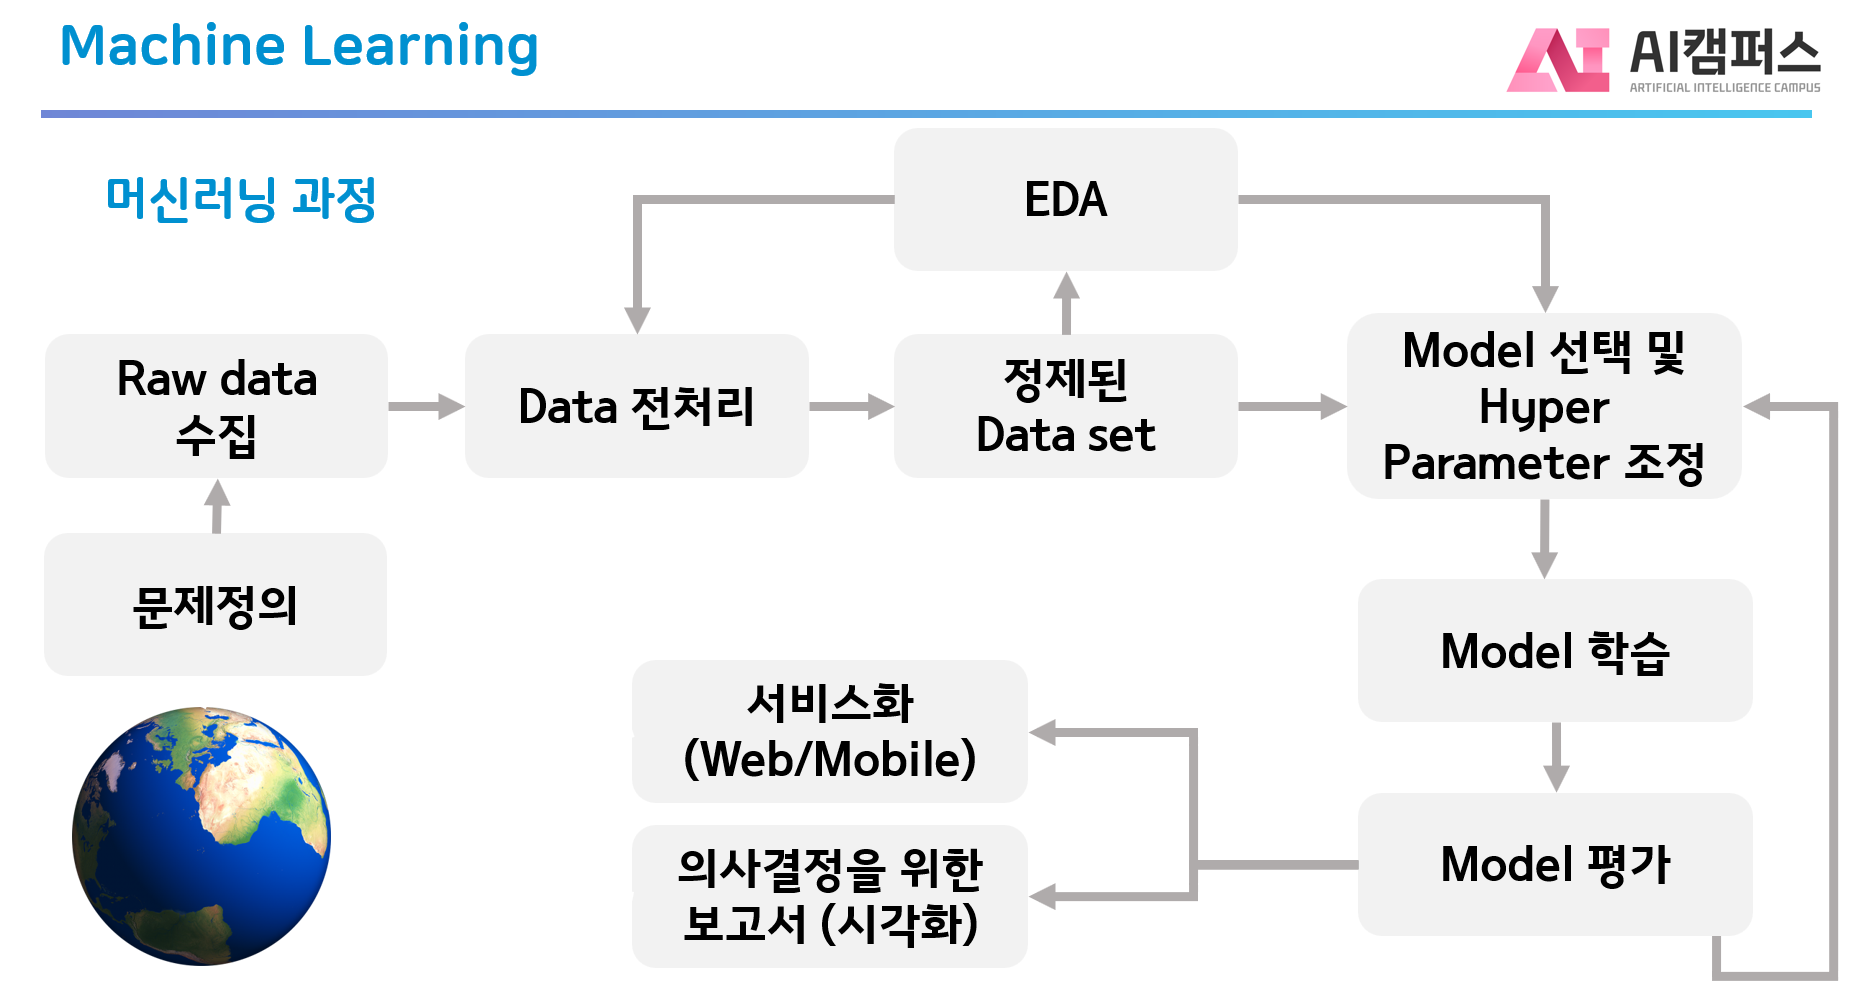

### 4. EDA (탐색적 데이터 분석, Exploratory Data Analysis)
- 데이터의 기술통계량 확인 (요약수치), 데이터를 시각화하여 다양한 각도에서 관찰, 이해하는 과정
- 데이터의 전처리를 위한 근거가 되기도 함
  - 예를 들어, 결측치를 처리할때 단순 데이터로 채우거나 단순 제거하는 것이 아닌, 대체할만한 값을들 탐색하여 결측치를 처리

In [ ]:
# 데이터의 기술통계량 확인


,count,mean,std,min,25%,50%,75%,max
T,1546.0,18.702808,8.787124,-1.900000,11.825000,19.225000,25.168750,44.600000
RH,1546.0,43.917987,14.464104,9.225000,36.150000,38.724999,51.468750,88.725000
AH,1546.0,0.977192,0.423748,0.198757,0.639129,0.959642,1.289465,2.139496
Comfortable,1546.0,0.482536,0.499857,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# 상관계수 : 컬럼들끼리 비례,반비례 정도를 숫자로 표현한 값


,T,RH,AH,Comfortable
T,1.000000,-0.414828,0.776049,0.080162
RH,-0.414828,1.000000,0.182484,-0.431584
AH,0.776049,0.182484,1.000000,-0.113466
Comfortable,0.080162,-0.431584,-0.113466,1.000000


#### 상관계수 해석

```
|r| = 절대값  

· 0.0 <= |r| < 0.2 : 상관관계가 없다. = 선형의 관계가 없다.  

· 0.2 <= |r| < 0.4 : 약한 상관관계가 있다.  

· 0.4 <= |r| < 0.6 : 보통의 상관관계가 있다.  

· 0.6 <= |r| < 0.8 : 강한 (높은) 상관관계가 있다.  

· 0.8 <= |r| <= 1.0 : 매우 강한 (매우 높은) 상관관계가 있다.
```

### 학습전 데이터 준비(분리)
1. 문제데이터, 정답데이터
2. train(학습용 데이터), test(예측 및 평가용 데이터)

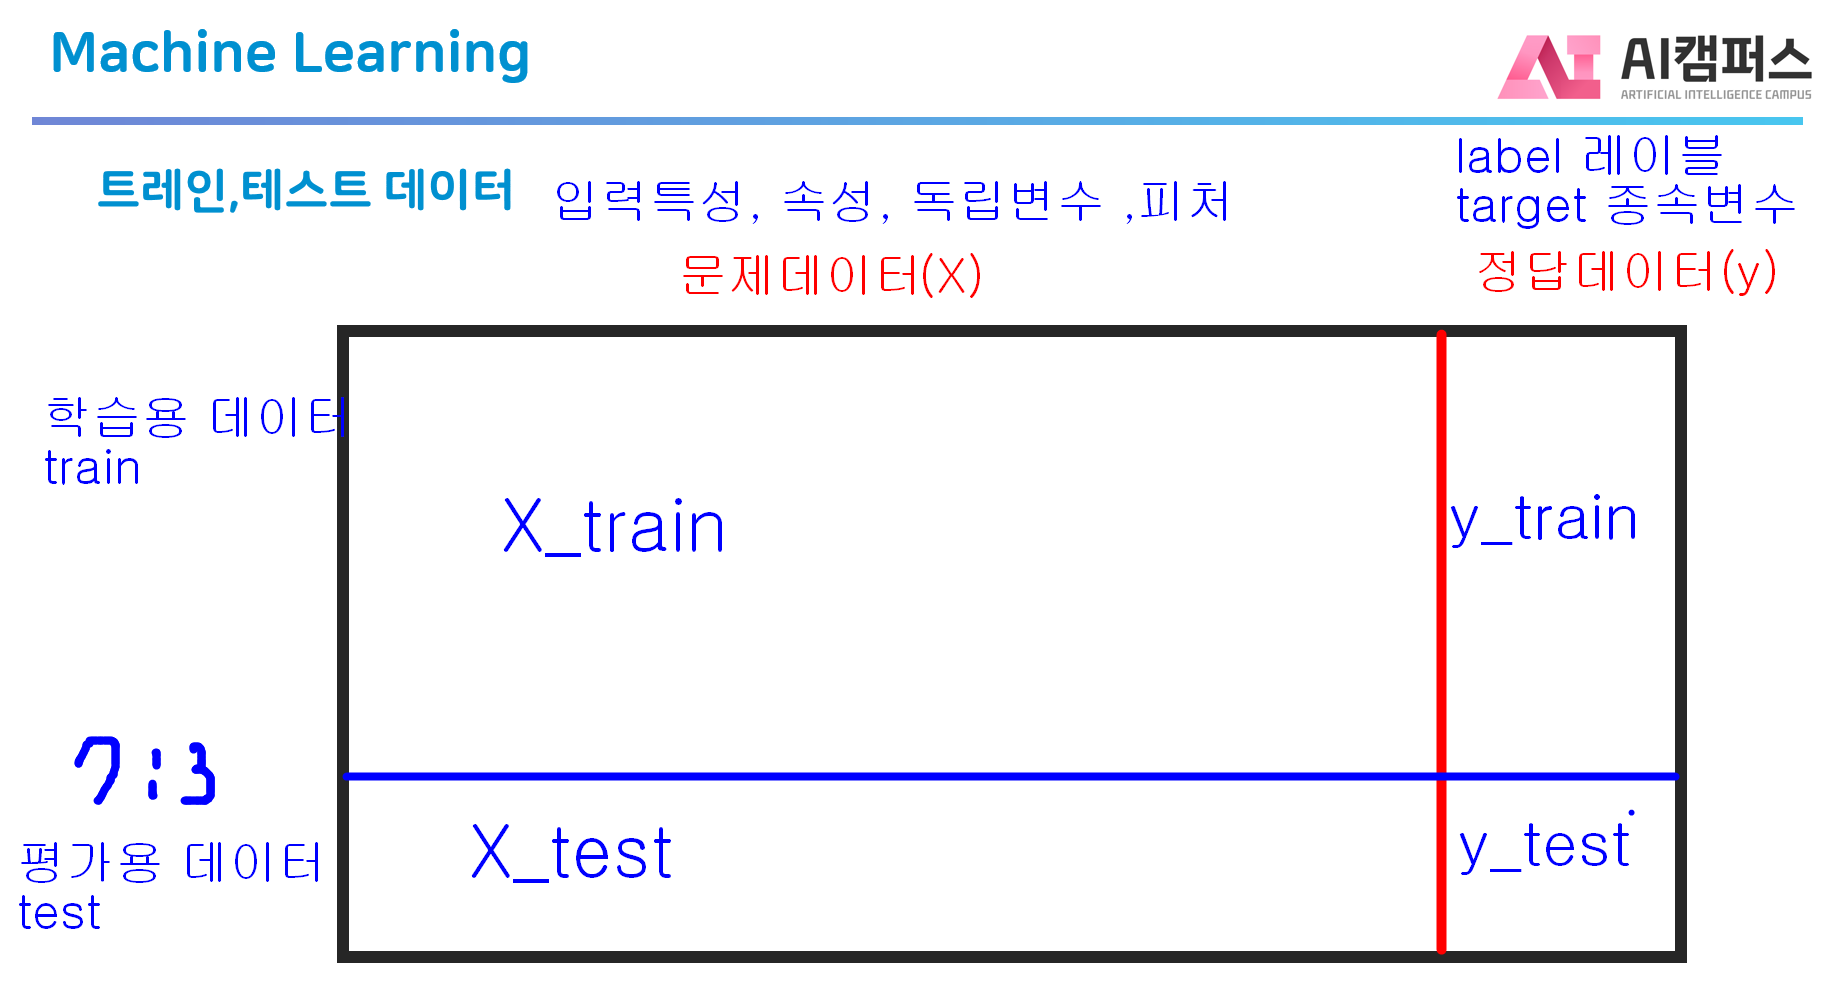

In [ ]:
# 머신러닝 학습을 위한 데이터 분리


In [ ]:
# 데이터 크기 확인


((1546, 3), (1546,))

,T,RH,AH,Comfortable
0,21.025,30.625000,0.753814,0
1,9.250,37.550000,0.439072,1
2,35.825,28.724999,1.662621,0
3,15.975,35.824999,0.645597,1
4,12.200,69.575001,0.985989,0


In [ ]:
# 직접적인 train, test 분리 (70:30)


1082.1999999999998


In [ ]:
# 데이터 크기확인


학습용 문제데이터:  (1082, 3)
학습용 정답데이터:  (1082,)
평가용 문제데이터:  (464, 3)
평가용 정답데이터:  (464,)


,count
Comfortable,
0,541
1,541


,count
Comfortable,
0,259
1,205


In [ ]:
# 데이터 분할 도구 사용


,T,RH,AH
1372,9.600000,43.475000,0.520190
18,5.025000,36.050000,0.317809
456,6.700000,39.575000,0.390621
1401,28.000000,36.550000,1.360298
1454,27.025000,38.700001,1.361006
...,...,...,...
551,-0.250000,38.350000,0.234715
1364,20.500000,38.425000,0.916097
1384,36.125000,22.100000,1.300424
847,20.900001,48.900000,1.194542


In [ ]:
# 데이터 크기확인


학습용 문제데이터:  (1082, 3)
학습용 정답데이터:  (1082,)
평가용 문제데이터:  (464, 3)
평가용 정답데이터:  (464,)


### sklearn (사이킷런)
- 대표적인 머신러닝 라이브러리, 머신러닝에 필요한 다양한 도구들 지원
- 지도학습모델(분류/회귀), 비지도학습모델, 전처리도구, 실습용 데이터 등등 다양한 머신러닝 학습을 위한 도구를 지원
- https://scikit-learn.org/stable/getting_started.html

##### 모델 학습 예측 및 평가 과정
5. 모델 선택 및 하이퍼파라미터 조절
  - 모델 도구 불러오기
  - 모델 객체생성
6. 모델 학습
  - model.fit(학습용문제, 학습용정답)
7. 모델 평가
  - 예측: model.predict(평가용문제)  
      -> 평가 방법: accuracy_score(예측값, 실제값)
  - 평가: model.score(평가용문제, 평가용정답)

In [ ]:
# KNN 모델 사용해보기
# 데이터의 특성 중  최근접한 이웃을 따라가는 방법


In [ ]:
# 모델 학습 model.fit(학습용문제, 학습용정답)


KNeighborsClassifier()

In [ ]:
# 모델 예측 model.predict(평가용문제)


In [ ]:
# 예측값 실제값 비교


(0, 0)

In [ ]:
# 모델 평가
from sklearn.metrics import accuracy_score


0.9719827586206896

- 하이퍼 파라미터 조절
  - 모델의 성능을 높이기 위해 사람이 조절하는 파라미터

In [ ]:
# knn 모델의 하이퍼파라미터 : 이웃의 수
# 객체 생성시 하이퍼파라미터 조절


In [ ]:
# 모델학습 fit


KNeighborsClassifier(n_neighbors=1)

In [ ]:
# 모델예측 predict


In [ ]:
# 모델평가 accuracy_score


0.9870689655172413

In [ ]:
# 모델 평가 방법 2


0.9870689655172413

### 일반화, 과대적합, 과소적합
- 일반화
  - 훈련데이터로 학습한 모델이 테스트데이터에 대해서도 정확히 예측하는 것 (훈련,테스트 모두 높은 정확도)
- 과대적합(overfitting)
  - 훈련데이터인 train 데이터에만 과하게 학습을하여 test 데이터에 대해서는 성능이 낮게 출력
- 과소적합 (underfitting)
  - 모델이 제대로된 학습을 하지 않아 train 데이터, test 데이터 모두에게서 성능이 낮게 출력

### 모델의 일반화 곡선
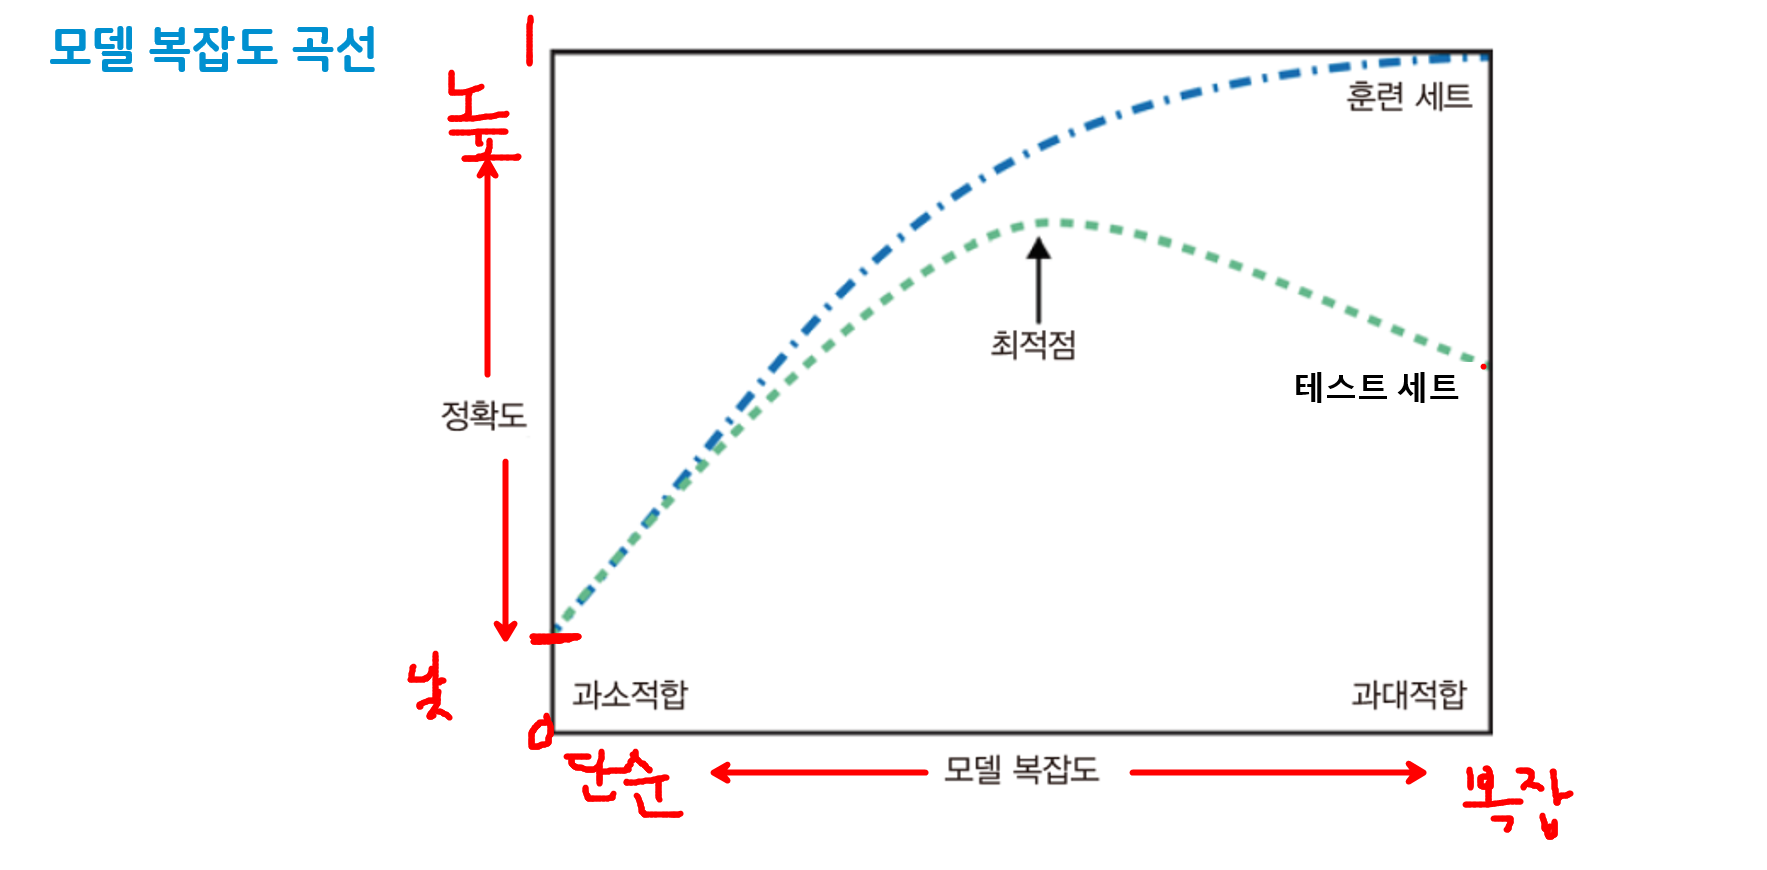

In [ ]:
# 1부터 99까지의 이웃수를 하이퍼파라미터로 가지는 모델링
# 정확도 결과 시각화 (모델의 복잡도 곡선) -> train 정확도, test 정확도


In [ ]:
train_list

[1.0,
 0.9972273567467652,
 0.9898336414048059,
 0.9898336414048059,
 0.9870609981515711,
 0.987985212569316,
 0.9805914972273567,
 0.9815157116451017,
 0.977818853974122,
 0.9787430683918669,
 0.9750462107208873,
 0.9759704251386322,
 0.967652495378928,
 0.9685767097966729,
 0.967652495378928,
 0.9685767097966729,
 0.967652495378928,
 0.967652495378928,
 0.966728280961183,
 0.966728280961183,
 0.9639556377079482,
 0.9639556377079482,
 0.9611829944547134,
 0.9611829944547134,
 0.9593345656192237,
 0.9611829944547134,
 0.9593345656192237,
 0.9602587800369686,
 0.9593345656192237,
 0.9593345656192237,
 0.9584103512014788,
 0.9584103512014788,
 0.9584103512014788,
 0.9584103512014788,
 0.955637707948244,
 0.955637707948244,
 0.9537892791127541,
 0.9547134935304991,
 0.9537892791127541,
 0.9547134935304991,
 0.9519408502772643,
 0.9519408502772643,
 0.9510166358595195,
 0.9519408502772643,
 0.9482439926062847,
 0.9491682070240296,
 0.9454713493530499,
 0.9482439926062847,
 0.94547134935304

In [ ]:
test_lis

[0.9870689655172413,
 0.9935344827586207,
 0.9762931034482759,
 0.9762931034482759,
 0.9719827586206896,
 0.9719827586206896,
 0.9698275862068966,
 0.9698275862068966,
 0.9633620689655172,
 0.9676724137931034,
 0.9655172413793104,
 0.9655172413793104,
 0.9612068965517241,
 0.9612068965517241,
 0.9568965517241379,
 0.959051724137931,
 0.9525862068965517,
 0.9568965517241379,
 0.9547413793103449,
 0.9547413793103449,
 0.9547413793103449,
 0.9547413793103449,
 0.9547413793103449,
 0.9547413793103449,
 0.9525862068965517,
 0.9525862068965517,
 0.9504310344827587,
 0.9504310344827587,
 0.9504310344827587,
 0.9504310344827587,
 0.9439655172413793,
 0.9439655172413793,
 0.9353448275862069,
 0.9375,
 0.9288793103448276,
 0.9310344827586207,
 0.9245689655172413,
 0.9245689655172413,
 0.9245689655172413,
 0.9245689655172413,
 0.9202586206896551,
 0.9202586206896551,
 0.9181034482758621,
 0.9202586206896551,
 0.9137931034482759,
 0.915948275862069,
 0.9094827586206896,
 0.9094827586206896,
 0.909

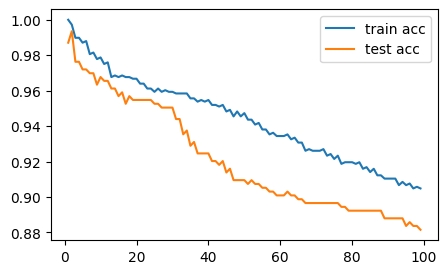

In [ ]:
# 시각화 (모델의 복잡도 곡선)


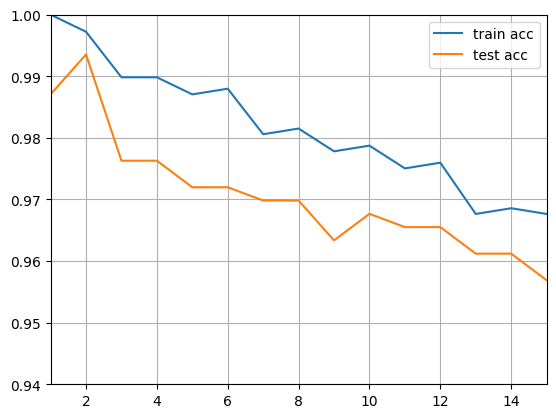

In [ ]:
# 최적의 하이퍼파라미터 선택을 위해 그래프 확대 (0~15)


### Decision Tree (의사결정나무 모델)
- 스무고개 하듯이 질문(조건)을 통해 데이터를 분류하는 모델
- 불순도가 낮아지는 방향으로 질문을 선정

0.9978448275862069

Index(['T', 'RH', 'AH'], dtype='object')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts,

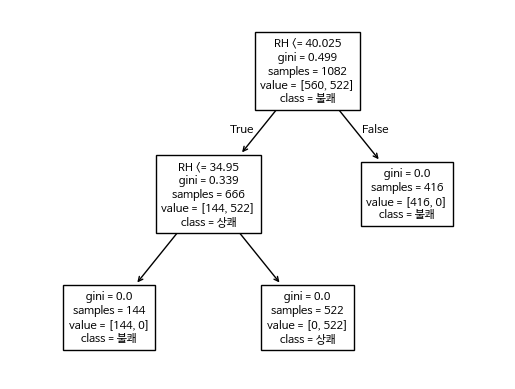

In [ ]:
# 트리모델 시각화


((1082, 2), (464, 2))

In [ ]:
# 하이퍼파라미터 조절 X , 의사결정나무 학습 및 평가


0.9288793103448276

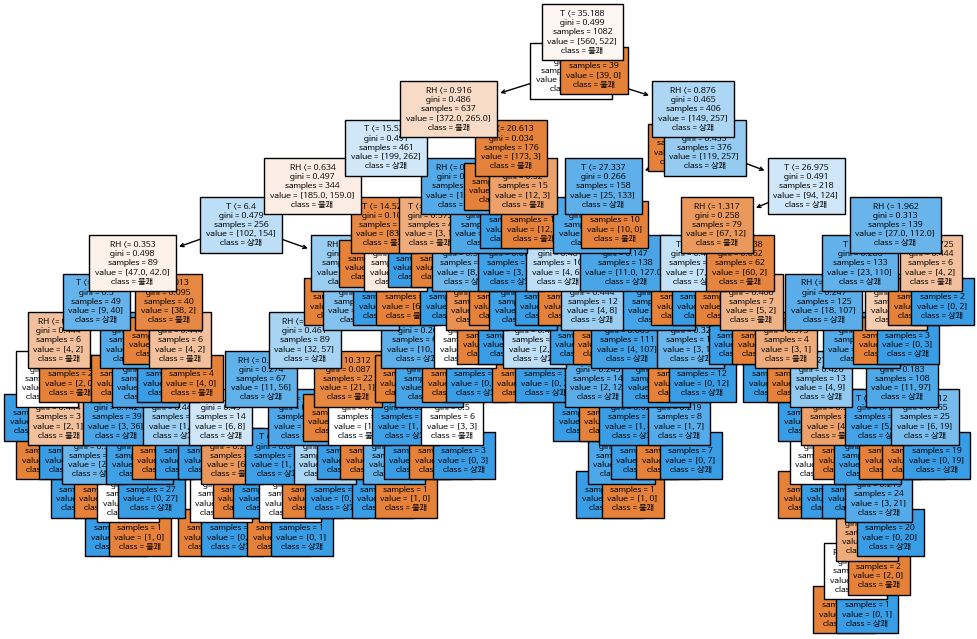

In [ ]:
#시각화


0.8168103448275862

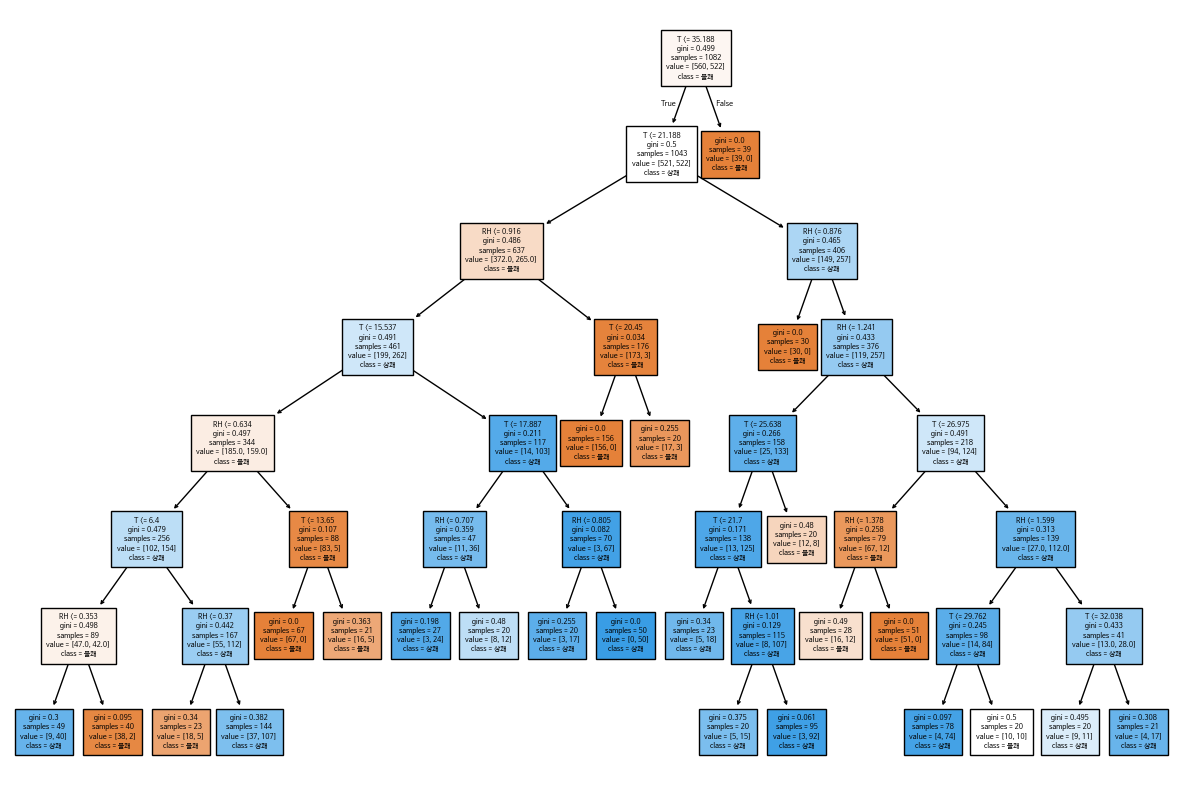

,T,AH
734,13.975,0.535527
555,18.675,1.566380
556,27.225,1.314686
1257,8.350,0.420338
3,15.975,0.645597
...,...,...
1204,21.350,0.897470
1212,20.250,0.894612
225,12.225,0.527679
366,6.425,0.619183
